In [48]:
import pandas as pd
from sqlalchemy import create_engine


In [49]:
engine=create_engine('sqlite:///C:\\Users\\Vinit Thakur\\Desktop\\SQLML.db')


In [50]:
table_names=engine.table_names()
print(table_names)

['BirthRate', 'LifeExp', 'dengue', 'epi', 'gdp', 'population']


In [51]:
con=engine.connect()

In [52]:
# Executing complex query
df5=pd.read_sql_query("SELECT LifeExp.country, LifeExp.LifeExpectancy, population.area, population.popdensity, population.population, epi.EPI, dengue.DengueCases, BirthRate.BirthRate, GDP.gdp FROM LifeExp \
LEFT JOIN population ON LifeExp.country= population.country \
LEFT JOIN epi ON LifeExp.country=epi.country \
LEFT JOIN dengue ON LifeExp.country= dengue.country \
LEFT JOIN BirthRate ON LifeExp.country= BirthRate.country \
LEFT JOIN gdp ON LifeExp.country= gdp.contry", engine)
df5.head()

,country,LifeExpectancy,area,popdensity,population,EPI,DengueCases,BirthRate,GDP
0,Hong Kong,84.7,2755.0,0.0,7024200.0,NaN,None,NaN,372989.0
1,Japan,84.5,377972.0,339.0,128056000.0,74.69,None,8.0,5154475.0
2,Singapore,83.8,721.5,0.0,5076700.0,64.23,"5,103",9.0,362818.0
3,Switzerland,83.6,41285.0,0.0,7785806.0,87.42,None,11.0,715360.0
4,Italy,83.4,301338.0,200.0,60340328.0,76.96,None,8.0,1988636.0


In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
country           191 non-null object
LifeExpectancy    191 non-null float64
area              151 non-null float64
popdensity        174 non-null float64
population        174 non-null float64
EPI               171 non-null float64
DengueCases       34 non-null object
BirthRate         179 non-null float64
GDP               176 non-null float64
dtypes: float64(7), object(2)
memory usage: 13.5+ KB


In [54]:
df=df5.drop(['DengueCases'], axis=1) 

In [56]:
df['area'].fillna(df['area'].median(), inplace=True)
df['popdensity'].fillna(df['popdensity'].median(), inplace=True)
df['population'].fillna(df['population'].median(), inplace=True)
df['EPI'].fillna(df['EPI'].median(), inplace=True)
df['BirthRate'].fillna(df['BirthRate'].median(), inplace=True)
df['GDP'].fillna(df['GDP'].median(), inplace=True)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [59]:
df.corr()

,LifeExpectancy,area,popdensity,population,EPI,BirthRate,GDP
LifeExpectancy,1.000000,0.068540,0.090865,0.006521,0.740283,-0.832817,0.193455
area,0.068540,1.000000,0.070437,0.440099,0.008391,-0.094214,0.549283
popdensity,0.090865,0.070437,1.000000,0.433983,-0.106868,-0.123275,0.204724
population,0.006521,0.440099,0.433983,1.000000,-0.200500,-0.074285,0.548048
EPI,0.740283,0.008391,-0.106868,-0.200500,1.000000,-0.661552,0.094962
BirthRate,-0.832817,-0.094214,-0.123275,-0.074285,-0.661552,1.000000,-0.196492
GDP,0.193455,0.549283,0.204724,0.548048,0.094962,-0.196492,1.000000


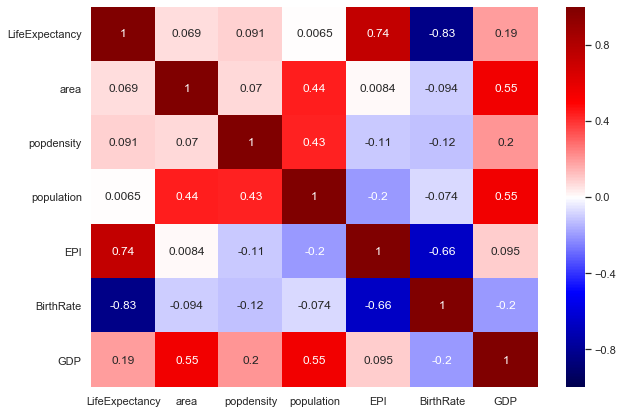

In [60]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

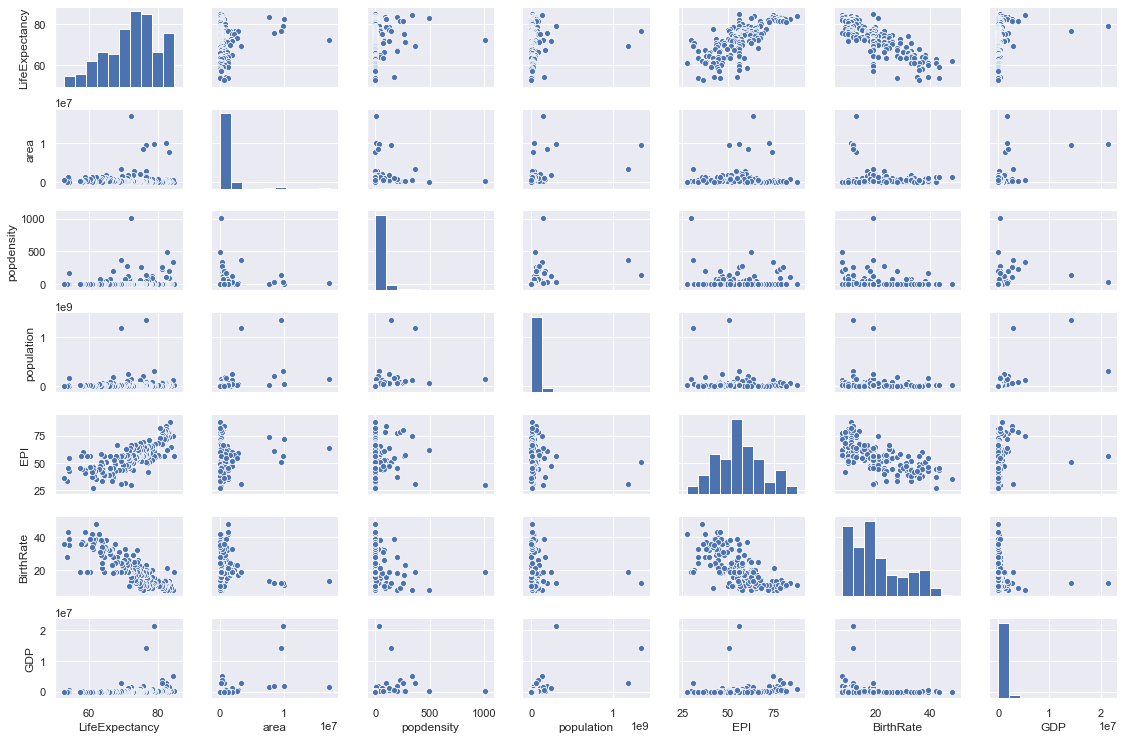

In [61]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.5, aspect=1.5);

In [63]:
# Apply Log transformation to all the features
df['BirthRate'] = np.log( df['BirthRate'] )
df['EPI'] = np.log( df['EPI'] )
df['population'] = np.log( df['population'] )
df['area'] = np.log( df['area'] )
df['popdensity'] = np.log( df['popdensity'] )
df['GDP'] = np.log( df['GDP'] )

C:\Users\Vinit Thakur\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


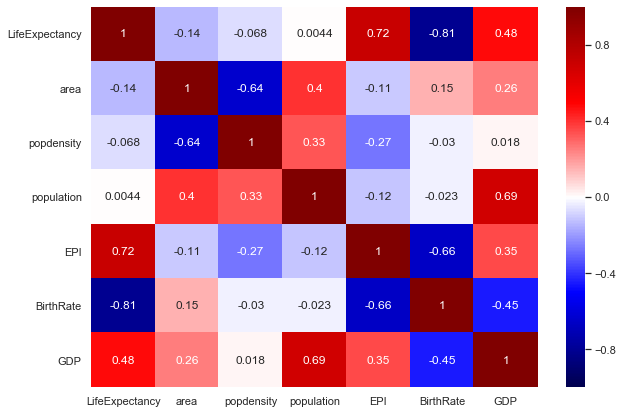

In [64]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

C:\Users\Vinit Thakur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Vinit Thakur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


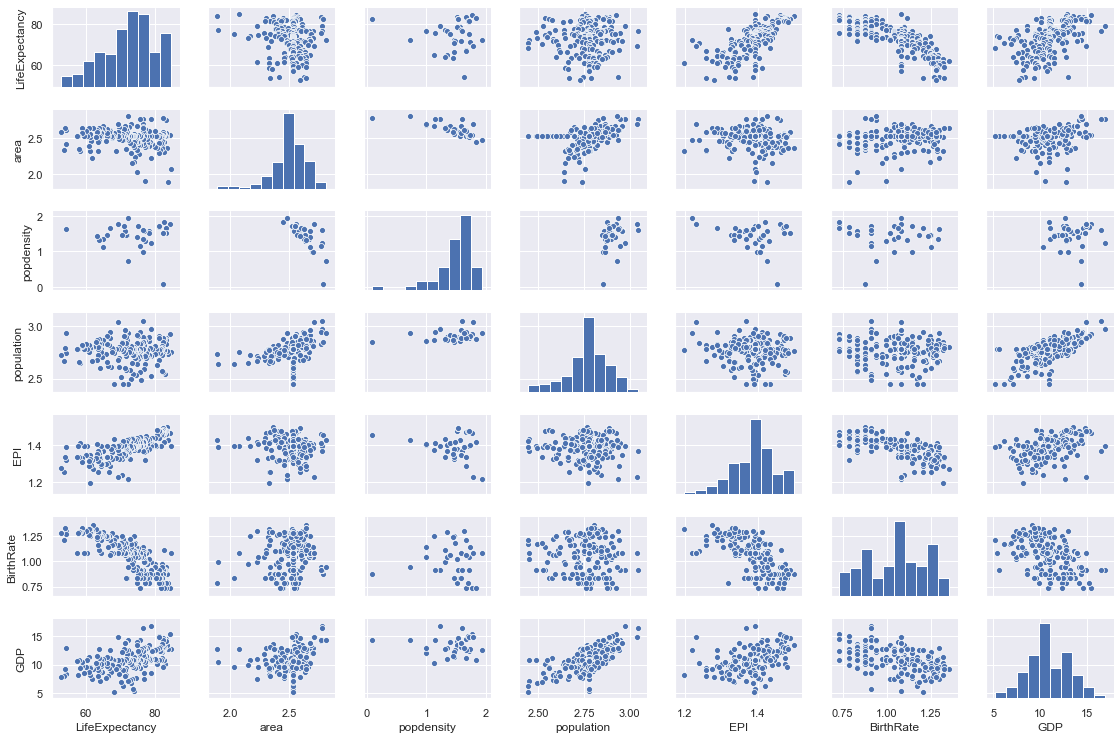

In [65]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df, height=1.5, aspect=1.5);

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [77]:
df.shape


(43, 7)

In [69]:
df=df.dropna()

In [73]:


model = LinearRegression()
X = df[ ['area', 'popdensity', 'population', 'EPI', 'BirthRate', 'GDP'] ]
y = df[ ['LifeExpectancy'] ]
# Fit the model to the full dataset
model.fit(X, y)
# Print out the R^2 for the model against the full dataset
print(model.score(X, y))
# print out intercept
print(model.intercept_)
# print out other coefficients
print(model.coef_)

0.7947451347063783
[163.2780256]
[[-21.67047347  -4.1745792  -13.22739147  10.69711278 -23.56087124
    1.60270532]]


In [ ]:
# Interpretation: Life expectancy of a country is higher for smaller countries having higher EPI and low birth rate